### 線形回帰モデルのフルスクラッチ


In [150]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "/Users/andoutakaaki/DIC_study/Sprint2"]).decode("utf8")) #check the files available in the directory

CCPP
CCPP.zip
Downloads
Untitled.ipynb
sprint2-ml-scratch-linear-regression.ipynb
test.csv
train.csv



### データセットの用意

In [2]:
train=pd.read_csv("train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [161]:
test=pd.read_csv("test.csv")
test = test.loc[:,['GrLivArea', 'YearBuilt']]

In [3]:
x_df = train[['GrLivArea', 'YearBuilt']]
y_df = train[['SalePrice']]

In [4]:
x_df.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [5]:
y_df.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


### プロット

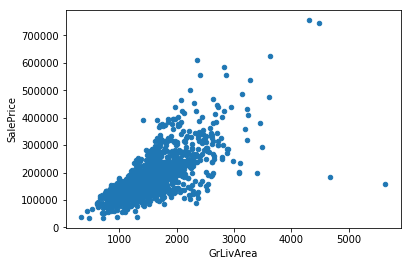

In [6]:
# grlivareaとsalepriceの関係を散布図にする
# 項目を横並びにならべる。 axis=0だと縦に並べる
scatter_df = pd.concat([y_df['SalePrice'], x_df['GrLivArea']], axis=1)
# yの範囲を0,800000にして散布図を表示
scatter_df.plot.scatter(x='GrLivArea', y='SalePrice');


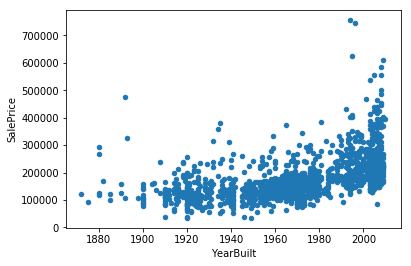

In [7]:
# salepriceとYearBuiltの関係を散布図にする
# 項目を横並びにならべる。 axis=0だと縦に並べる
scatter_df = pd.concat([x_df['YearBuilt'], y_df['SalePrice']], axis=1)
# yの範囲を0,800000にして散布図を表示
scatter_df.plot.scatter(x='YearBuilt', y='SalePrice');

目的変数と説明変数間には正の相関があることが分かる

### テストデータの分割
train.csvを学習用（train）8割、検証用（val）2割に分割する

In [8]:
def train_test_split(X, y, train_size=0.8,):
    """
    学習用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く
    
    pass

    return X_train, X_test, y_train, y_test

### 欠損値の数を見る

In [9]:
train.isnull().sum()[train.isnull().sum()!=0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
categorical_feats = [
    f for f in train.columns if train[f].dtype == 'object'
]
categorical_feats_ = categorical_feats.copy()# 43


for f in categorical_feats_:
    train[f], _ = pd.factorize(train[f])
    train[f] = train[f].astype('int')

In [12]:
############################## 全体にはNaNがいる

print(train.isnull().values.sum()!=0)

train.head()

True


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.000,8450,0,-1,0,0,0,...,0,-1,-1,-1,0,2,2008,0,0,208500
1,2,20,0,80.000,9600,0,-1,0,0,0,...,0,-1,-1,-1,0,5,2007,0,0,181500
2,3,60,0,68.000,11250,0,-1,1,0,0,...,0,-1,-1,-1,0,9,2008,0,0,223500
3,4,70,0,60.000,9550,0,-1,1,0,0,...,0,-1,-1,-1,0,2,2006,0,1,140000
4,5,60,0,84.000,14260,0,-1,1,0,0,...,0,-1,-1,-1,0,12,2008,0,0,250000


In [13]:
# factorizeでNaNから変換された-1を平均値で置き換える

train = train.reset_index(drop=True)

for c in train.columns:
    for i in range(train.shape[1]):
        if train[c][i] == -1:
            train[c][i] = train[c].mean()
            
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.000,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.000,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.000,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.000,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.000,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000


In [14]:
train[c].mean(), train[c].median()

(180921.19589041095, 163000.0)

### モジュール化

In [15]:
import sys
sys.path.append ("/Users/andoutakaaki/DIC_study/Sprint2")

### スケーリング
標準化を行い、再度散布図を描く

In [16]:
class ScratchStandardScaler():
    """
    標準化する。
    """

    def fit(self, X):
        """
        標準化のために平均と標準偏差を計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        """
        pass

    def transform(self, X):
        """
        fitで求めた値を使い標準化を行う。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          特徴量

        Returns
        ----------
        X_scaled : 次の形のndarray, shape (n_samples, n_features)
          標準化された特緒量
        """
        pass
        return X_scaled

### 線形回帰のクラスを作成する

In [17]:
class ScratchLinearRegression():
    """
    線形回帰
    ＊コンストラクタ（__init__）のパラメータはここに書いておくと分かりやすい

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        pass
        return

### 実行ファイルとコマンドライン引数

### コマンドライン引数をJupyter Notebookで置き換えるためのクラス

In [18]:
class DammyParser():
    def __init__(self):
        self.iter = 5000
        self.lr = 1e-3
        self.verbose = True
        self.no_bias = False
        self.dataset = "train.csv"

args = DammyParser()

In [19]:
# 正規化
x_norm = (x_df - x_df.mean())/ x_df.std()
y_norm = (y_df - y_df.mean())/ y_df.std()

### 最急降下法(勾配降下法、GradientDescent)
最急降下法を実装すること。また、内部からコスト関数を呼び出し、アルゴリズムを完成させること。 数式は以下になる。

$\theta_j := \theta_j - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^m[(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)} ]$

In [20]:
x = x_df

In [21]:
y = train['SalePrice']

In [22]:
def compute_cost(x, y,theta):
    y_pred = np.dot(x,theta)
    m=len(x)
    
    cost = 1/(2*m)*(np.sum((y_pred  - y)**2))
    return cost

In [23]:
def gradient_descent(x, y,alpha):
    theta = np.random.rand(2,1)
    x= x_df.values
    y =y_df.values
    
    past_costs = []
    past_thetas = []
  
    m = len(x)
    for i in range(50):
        # 仮定関数
        # update theta parameter
        error = np.dot(x, theta).reshape(1460,1) - y
        theta = theta - (alpha/m) * np.dot(x.T, error)
        cost = compute_cost(x, y,theta)
        past_costs.append(cost)
        past_thetas.append(theta)
    return past_costs, past_thetas

past_costs, past_thetas = gradient_descent(x, y,0.0000001)

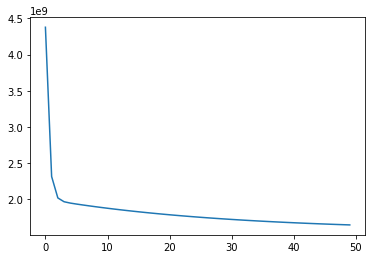

In [24]:
plt.plot(past_costs)

### クラス化

In [163]:
class ScratchLinearRegression():
    
    def __init__(self, num_iter, lr):
        # ハイパーパラメータを属性として記
        #イテレーションの数
        self.iter = num_iter
        #学習率=alpha
        self.lr = lr
#         self.bias = bias
#         self.verbose = verbose
        # 損失を記録する配列を用意
        self.theta = np.random.rand(2)
        self.loss = []
        self.val_loss = []

    def fit(self, x, y):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        ## 再急降下法からパラメータを呼び出す
        self.gradient_descent(x, y)
#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
#             print(np.array(self.train_loss))

    
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
    def compute_cost(x, y):
        y_pred = np.dot(x,self.theta)
        m = len(x)
        cost = 1/(2*m)*(np.sum((y_pred  - y)**2))
        return cost
    
    def gradient_descent(self,x, y):
        theta = np.random.rand(2,1)
        x= x_df.values
        y =y_df.values
    
        past_costs = []
        past_thetas = []
  
        m = len(x)
        for i in range(50):
            # 仮定関数
            # update theta parameter
            error = np.dot(self.theta,x.T).reshape(1460,1) - y
            theta = theta - (self.lr/m) * np.dot(x.T, error)
            cost = compute_cost(x, y,theta)
            past_costs.append(cost)
            past_thetas.append(theta)
        return past_costs, past_thetas
   
        # バイアス項判断
        if(self.no_bias):
            # パラメータthetaを乱数シードで代入
            print(np.array(self.train_loss))

    
    


        """
        最急降下法の計算
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples,)
          学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
          学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # バイアス項判断
        

    

    def predict(self, X):
        
        return np.dot(self.theta,np.array(X).T)

    def plot_learning_curve(self, x, y,): 
        # parameter size
        # theta_size = x.shape[1]

        # set initial theta
        theta = pd.DataFrame(np.random.rand(x.shape[1]))

        past_costs = gradient_descent(x, y, theta)[0]
        plt.plot(np.array(list(range(iterations+1))), np.array(past_costs))

        plt.title('Learning Curve', fontsize=20)

        plt.xlabel("iteration", fontsize=15)
        plt.ylabel("cost", fontsize=15)
        print("last cost is {}".format(past_costs[-1]))
        
        return np.dot(theta[-1],np.array(x))

In [164]:
model= ScratchLinearRegression(num_iter=5000,lr=0.001)


In [144]:
x=['GrLivArea', 'YearBuilt']

In [145]:
y =['SalePrice']

In [165]:
model.fit(x,y)
# gmodel.plot_learning_curve(x_norm, y_norm, 200, 0.05)

### テスト

In [166]:
model.predict(test)

array([2334.90551806, 2764.50113178, 3092.33624219, ..., 2661.26200992,
       2431.48638133, 3459.36855445])